In [0]:
!pip install -U tensorflow-gpu
!pip install nengo
!pip install git+https://github.com/nengo/nengo-dl.git

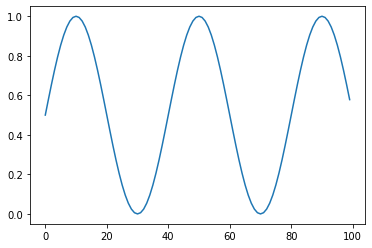

In [187]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt


# Creation of the serie
size = 100
time = np.arange(size)
serie = (np.sin(np.pi * 5 * time / size) + 1) / 2 

plt.plot(time, serie)
plt.show()   

maxlen = 5
sec = []
next_value = []

for i in range(0, len(serie) - maxlen):
  sec.append(serie[i: i + maxlen])
  next_value.append(serie[i + maxlen])

In [188]:
%%capture --no-stdout
from sklearn.model_selection import train_test_split
import numpy as np

x =  np.array(sec)
y =  np.array(next_value) 

x = x.reshape(x.shape[0], x.shape[1], 1)
y = y.reshape(y.shape[0], 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

print('x_train shape: {}'.format(x_train.shape)) 
print('y_train shape: {}'.format(y_train.shape))  
print('x_test shape: {}'.format(x_test.shape)) 
print('y_test shape: {}'.format(y_test.shape))    


x_train shape: (76, 5, 1)
y_train shape: (76, 1)
x_test shape: (19, 5, 1)
y_test shape: (19, 1)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf

def model_creator(neurons):
  model = Sequential()
  model.add(LSTM(neurons, input_shape=(maxlen, 1)))   
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mse', optimizer='rmsprop')
  return model

In [101]:
model_lstm4 = model_creator(4)
history_lstm4 = model_lstm4.fit(x_train, y_train, batch_size=16,epochs=5,verbose=2)

Train on 76 samples
Epoch 1/5
76/76 - 3s - loss: 0.3923
Epoch 2/5
76/76 - 0s - loss: 0.3588
Epoch 3/5
76/76 - 0s - loss: 0.3346
Epoch 4/5
76/76 - 0s - loss: 0.3133
Epoch 5/5
76/76 - 0s - loss: 0.2936


In [102]:
model_lstm6 = model_creator(6)
history_lstm6 = model_lstm6.fit(x_train, y_train, batch_size=16,epochs=5,verbose=2)

Train on 76 samples
Epoch 1/5
76/76 - 2s - loss: 0.2558
Epoch 2/5
76/76 - 0s - loss: 0.2200
Epoch 3/5
76/76 - 0s - loss: 0.1948
Epoch 4/5
76/76 - 0s - loss: 0.1731
Epoch 5/5
76/76 - 0s - loss: 0.1539


In [103]:
model_lstm8 = model_creator(8)
history_lstm8 = model_lstm8.fit(x_train, y_train, batch_size=16,epochs=5,verbose=2)

Train on 76 samples
Epoch 1/5
76/76 - 2s - loss: 0.8731
Epoch 2/5
76/76 - 0s - loss: 0.7500
Epoch 3/5
76/76 - 0s - loss: 0.6686
Epoch 4/5
76/76 - 0s - loss: 0.6024
Epoch 5/5
76/76 - 0s - loss: 0.5438


In [0]:
def evaluate_model(model, label, color):
  print('MSE: {:.5f}'.format(model.evaluate(x_test, y_test)))

  prediccion = model.predict(x_test)  

  plt.plot(range(len(x_test)), prediccion.reshape(prediccion.shape[0]), color+'--',label=label)
  plt.plot(range(len(x_test)), y_test, label="Test data")
  plt.legend()
  plt.show()

19/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 24ms/sample - loss: 0.5574
MSE: 0.55740


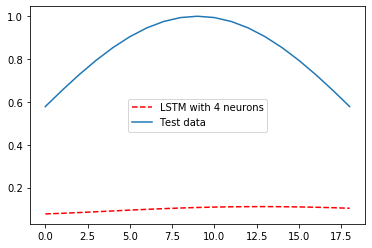

In [104]:
evaluate_model(model_lstm4, "LSTM with 4 neurons",'r')

19/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 23ms/sample - loss: 0.2871
MSE: 0.28710


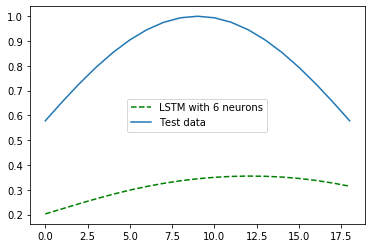

In [105]:
evaluate_model(model_lstm6, "LSTM with 6 neurons",'g')

19/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 267us/sample - loss: 0.9973
MSE: 0.99729


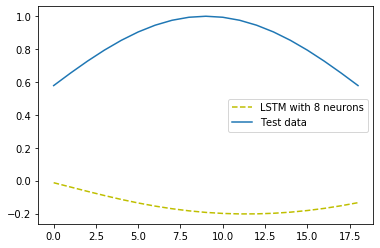

In [109]:
evaluate_model(model_lstm8, "LSTM with 8 neurons",'y')

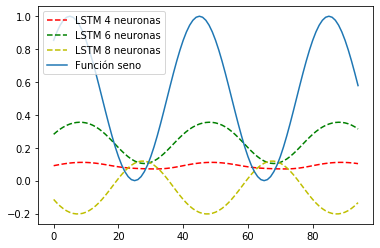

In [130]:
sec_generated_train = np.append(x_train,y_train)
sec_generated_test = np.append(y_train,y_test)

predLSTM4 = model_lstm4.predict(x)  
predLSTM6 = model_lstm6.predict(x) 
predLSTM8 = model_lstm8.predict(x)   

plt.plot(range(len(x)), predLSTM4.reshape(predLSTM4.shape[0]), 'r--',label="LSTM 4 neuronas")
plt.plot(range(len(x)), predLSTM6.reshape(predLSTM6.shape[0]), 'g--',label="LSTM 6 neuronas")
plt.plot(range(len(x)), predLSTM8.reshape(predLSTM8.shape[0]), 'y--',label="LSTM 8 neuronas")
plt.plot(range(len(x)), sec_generated_test, label="Función seno")
plt.legend()
plt.show()

In [0]:
!pip install git+https://github.com/nengo/nengo-dl.git

In [0]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [0]:
net_1 = nengo.Network()
net_1.config[nengo.Ensemble].neuron_type = nengo.RectifiedLinear()
net_1.config[nengo.Ensemble].max_rates = nengo.dists.Uniform(0, 1)
net_1.config[nengo.Connection].synapse = None

In [0]:
with net_1:
  def sin_func(t):
    output = (tf.sin(np.pi * 5 * t / size) + 1) / 2 
    output = tf.reshape(output, (1, 1))
    return output

  inp = nengo_dl.TensorNode(sin_func)
  ens = nengo.Ensemble(1, 1)
  f = nengo.Node(size_in=1)

  nengo.Connection(inp, ens)
  nengo.Connection(ens, f)

  f_p = nengo.Probe(f)

Build finished in 0:00:00                                                      
Optimization finished in 0:00:00                                               


/usr/local/lib/python3.6/dist-packages/nengo_dl/simulator.py:458: UserWarning: No GPU support detected. It is recommended that you install tensorflow-gpu (`pip install tensorflow-gpu`).
  "No GPU support detected. It is recommended that you "


Simulation finished in 0:00:10                                                 
0.4387536656003258


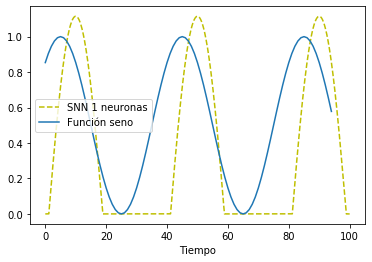

In [277]:
from sklearn.metrics import mean_squared_error

with nengo_dl.Simulator(net_1) as sim:
  sim.run(100.0)

  plt.figure()
  plt.plot(sim.trange(), sim.data[f_p], 'y--' ,label="SNN 1 neuronas")
  plt.plot(range(len(x)), sec_generated_test, label="Función seno")
  plt.legend()
  plt.xlabel("Tiempo")

  print(mean_squared_error(sim.data[f_p][:len(sec_generated_test)],sec_generated_test))

Build finished in 0:00:00                                                      
Optimization finished in 0:00:00                                               


/usr/local/lib/python3.6/dist-packages/nengo_dl/simulator.py:458: UserWarning: No GPU support detected. It is recommended that you install tensorflow-gpu (`pip install tensorflow-gpu`).
  "No GPU support detected. It is recommended that you "


Simulation finished in 0:00:17                                                 


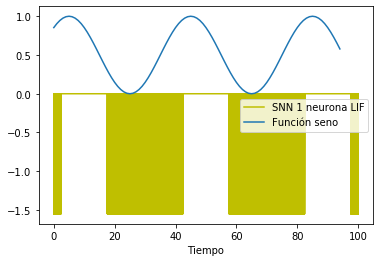

In [289]:
with nengo.Network() as net:
  def sin_func(t):
    output = (tf.sin(np.pi * 5 * t / size) + 1) / 2 
    output = tf.reshape(output, (1, 1))
    return output
  inp = nengo_dl.TensorNode(sin_func)
  ens = nengo.Ensemble(1, 1, neuron_type=nengo.LIF())
  nengo.Connection(inp, ens, synapse=None)
  p = nengo.Probe(ens)

with nengo_dl.Simulator(net) as sim:
  sim.run(100.0)

  plt.figure()
  plt.plot(sim.trange(), sim.data[p], 'y' ,label="SNN 1 neurona LIF")
  plt.plot(range(len(x)), sec_generated_test, label="Función seno")
  plt.legend()
  plt.xlabel("Tiempo")